## EDA - Telco Churn

In [4]:
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
telco_df = pd.read_csv('../data/processed/telco_churn.csv')
telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,0,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,0,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,1,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,0,70.70,151.65,1


## Churn rate

### General

In [22]:
counts = telco_df['Churn'].value_counts()
labels = ['No Churn', 'Churn']
sizes = [counts[0], counts[1]]

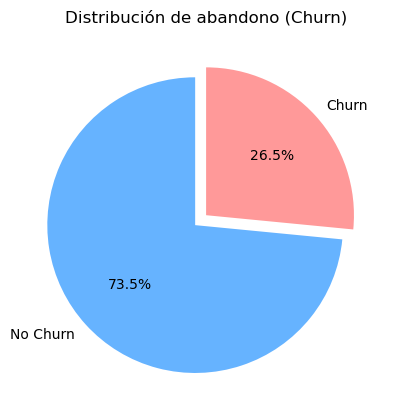

In [ ]:
fig, ax = plt.subplots()
ax.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%',
    startangle=90, 
    colors=['#66b3ff','#ff9999'],
    explode=(0.1, 0))
ax.set_title('Distribución de abandono (Churn)')
plt.show()

### Por servicio

#### Phone Service

In [32]:
phone_df = pd.read_csv('../data/processed/phone_service.csv')
phone_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7469-LKBCI,1,0,0,0,16,1,0,2,0,1,18.95,326.8,0
1,8191-XWSZG,0,0,0,0,52,1,0,1,0,0,20.65,1022.95,0
2,1680-VDCWW,1,0,1,0,12,1,0,1,0,1,19.80,202.25,0
3,1066-JKSGK,1,0,0,0,1,1,0,0,0,0,20.15,20.15,1
4,7310-EGVHZ,1,0,0,0,1,1,0,0,0,1,20.20,20.2,0


In [33]:
p_counts = phone_df['Churn'].value_counts()
p_labels = labels
p_sizes = [p_counts[0], p_counts[1]]

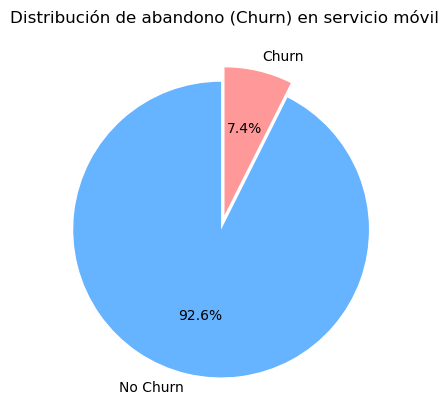

In [35]:
fig, ax = plt.subplots()
ax.pie(
    p_sizes, 
    labels=p_labels, 
    autopct='%1.1f%%',
    startangle=90, 
    colors=['#66b3ff','#ff9999'],
    explode=(0.1, 0))
ax.set_title('Distribución de abandono (Churn) en servicio móvil')
plt.show()

#### Internet Service

In [37]:
internet_df = pd.read_csv('../data/processed/internet_service.csv')
internet_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,1,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,7795-CFOCW,1,0,0,0,45,1,1,0,1,1,0,0,1,0,1,42.30,1840.75,0
2,6713-OKOMC,0,0,0,0,10,1,1,0,0,0,0,0,0,0,0,29.75,301.9,0
3,8779-QRDMV,1,1,0,0,1,1,0,0,1,0,0,1,0,1,0,39.65,39.65,1
4,8665-UTDHZ,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,30.20,30.2,1


In [42]:
i_counts = internet_df['Churn'].value_counts()
i_labels = labels
i_sizes = [i_counts[0], i_counts[1]]

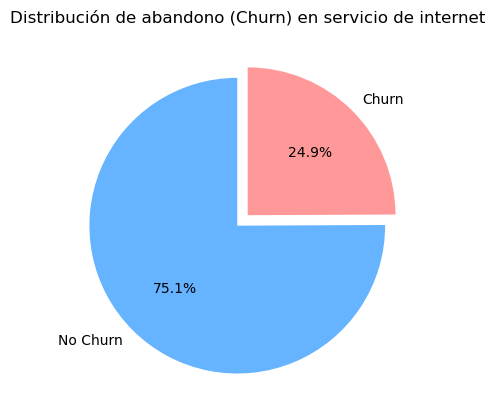

In [43]:
fig, ax = plt.subplots()
ax.pie(
    i_sizes, 
    labels=i_labels, 
    autopct='%1.1f%%',
    startangle=90, 
    colors=['#66b3ff','#ff9999'],
    explode=(0.1, 0))
ax.set_title('Distribución de abandono (Churn) en servicio de internet')
plt.show()

#### Both Services

In [45]:
both_df = pd.read_csv('../data/processed/phone_internet_service.csv')
both_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5575-GNVDE,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,0,56.95,1889.5,0
1,3668-QPYBK,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,0,53.85,108.15,1
2,6388-TABGU,1,0,0,1,62,1,0,1,1,1,0,0,0,0,1,0,1,56.15,3487.95,0
3,9763-GRSKD,1,0,1,1,13,1,0,1,1,0,0,0,0,0,0,1,0,49.95,587.45,0
4,4190-MFLUW,0,0,1,1,10,1,0,1,0,0,1,1,0,0,0,0,1,55.20,528.35,1


In [46]:
b_counts = both_df['Churn'].value_counts()
b_labels = labels
b_sizes = [b_counts[0], b_counts[1]]

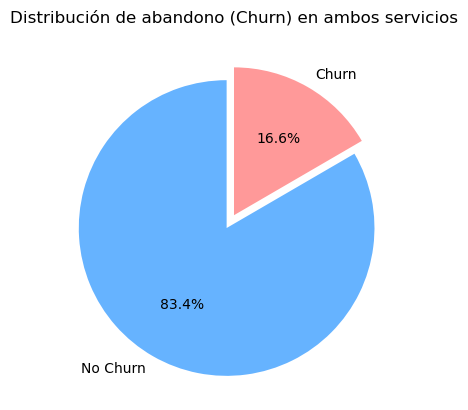

In [48]:
fig, ax = plt.subplots()
ax.pie(
    b_counts,
    labels = b_labels,
    autopct='%1.1f%%',
    startangle=90, 
    colors=['#66b3ff','#ff9999'],
    explode=(0.1, 0))
ax.set_title('Distribución de abandono (Churn) en ambos servicios')
plt.show()

## Senior vs Churn

In [78]:
senior_df = telco_df[telco_df['SeniorCitizen'] == 1]
senior_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,39.65,39.65,1
30,3841-NFECX,0,1,1,0,71,1,1,2,1,1,1,1,0,0,2,1,1,96.35,6766.95,0
31,4929-XIHVW,1,1,1,0,2,1,0,2,0,0,1,0,1,1,0,1,1,95.50,181.65,0
34,3413-BMNZE,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,45.25,45.25,0
50,8012-SOUDQ,0,1,0,0,43,1,1,2,0,1,0,0,1,0,0,1,0,90.25,3838.75,0


In [79]:
counts = senior_df['Churn'].value_counts()
labels = ['Churn', 'No churn']
sizes = [counts[0], counts[1]]


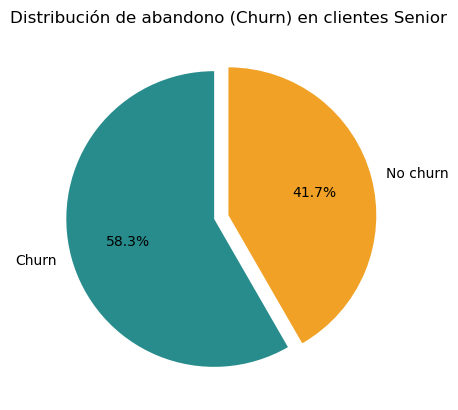

In [83]:
fig, ax = plt.subplots()
ax.pie(
    counts,
    labels = labels,
    autopct='%1.1f%%',
    startangle=90, 
    colors=['#298C8C','#F1A226'],
    explode=(0.1, 0))
ax.set_title('Distribución de abandono (Churn) en clientes Senior')
plt.show()

## Gender vs Churn

In [84]:
female_df = telco_df[telco_df['gender'] == 0]
male_df = telco_df[telco_df['gender'] == 1]

In [97]:
labels = ['No churn', 'Churn']
female_counts = female_df['Churn'].value_counts()
male_counts = male_df['Churn'].value_counts()

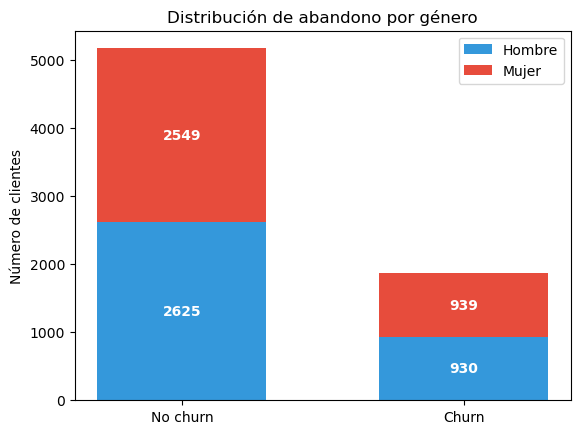

In [98]:
fig, ax = plt.subplots()
width = 0.6
ax.bar(
    labels,
    male_counts,
    width,
    label = 'Hombre', 
    color = '#3498db'
)
ax.bar(
    labels,
    female_counts, 
    width,
    bottom= male_counts,
    label = 'Mujer',
    color = '#e74c3c'
)
ax.set_ylabel('Número de clientes')
ax.set_title('Distribución de abandono por género')
ax.legend()
for p in ax.patches:
    width, height = p.get_width(), p.get_height(),
    x,y = p.get_xy()
    if height > 0:
        ax.annotate(f'{int(height)}', (x + width/2, y + height/2), ha='center', va='center', color='white', weight='bold')
plt.show()